In [ ]:
#importing the required libraries
import tensorflow as tf
import pandas as pd
import numpy as np
from tensorflow.keras.datasets import fashion_mnist
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt


# Loading the data and Storing it in the respective Train and Testing formats

In [ ]:
(train_data,train_labels),(test_data,test_labels)=fashion_mnist.load_data()

# Visualizing the Data

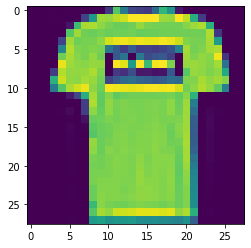

In [ ]:

plt.imshow(train_data[1])

In [ ]:
#Creating Labels in Human Readable Form
class_names=["T-shirt/top","Trouser","Pullover",
"Dress",
"Coat",
"Sandal",
"Shirt",
"Sneaker",
"	Bag",
"Ankle boot"]
len(class_names)

10

Text(0.5, 1.0, 'T-shirt/top')

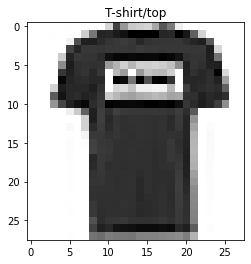

In [ ]:
index_of_choice=1
plt.imshow(train_data[index_of_choice],cmap=plt.cm.binary)
plt.title(class_names[train_labels[index_of_choice]])

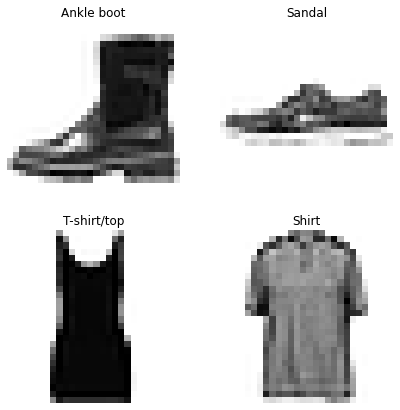

In [ ]:
#isualizing 4 random images from the Dataset
import random
plt.figure(figsize=(7,7))
for i in range(4):
  ax=plt.subplot(2,2,i+1)
  rand_index=random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index],cmap=plt.cm.binary)
  plt.title(class_names[train_labels[rand_index]])
  plt.axis(False)

#Generating the model

Creating a simple model

In [ ]:
#Setting random seed
tf.random.set_seed(42)
#Creating the model
model_1=tf.keras.Sequential([
                              tf.keras.layers.Flatten(input_shape=(28,28)),#Flattening the input shape
                              tf.keras.layers.Dense(4,activation='relu'),
                              tf.keras.layers.Dense(4,activation='relu'),
                              tf.keras.layers.Dense(10,activation=tf.keras.activations.softmax)
])
#Compiling the model
model_1.compile(loss=tf.keras.losses.sparse_categorical_crossentropy,#Using sparse categorical loss as labels are in integer form
                 optimizer='Adam',
                 metrics=['accuracy'])
#Fitting the Data
non_norm_history=model_1.fit(train_data,train_labels,epochs=10,validation_data=(test_data,test_labels))

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.1671 - accuracy: 0.1606 - val_loss: 1.7959 - val_accuracy: 0.2046
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.7066 - accuracy: 0.2509 - val_loss: 1.6567 - val_accuracy: 0.2805
Epoch 3/10
1875/1875 [==============================] - 3s 1ms/step - loss: 1.6321 - accuracy: 0.2806 - val_loss: 1.6094 - val_accuracy: 0.2857
Epoch 4/10
1875/1875 [==============================] - 3s 1ms/step - loss: 1.6052 - accuracy: 0.2833 - val_loss: 1.6041 - val_accuracy: 0.2859
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.5975 - accuracy: 0.2862 - val_loss: 1.6064 - val_accuracy: 0.2756
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.5950 - accuracy: 0.2920 - val_loss: 1.5747 - val_accuracy: 0.2994
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.5775 - accuracy: 0.3040 - val_loss: 1.6030 - val_accuracy:

Normalizing the Data

In [ ]:
train_data_norm=train_data/255.0
test_data_norm=test_data/255.0
train_data_norm.min(),test_data_norm.max()

(0.0, 1.0)

Creating a model in normalized data


In [ ]:
#Setting random seed
tf.random.set_seed(42)
#creating the model
model_2=tf.keras.Sequential([
                              tf.keras.layers.Flatten(input_shape=(28,28)),#Flattening the input shape
                              tf.keras.layers.Dense(4,activation='relu'),
                              tf.keras.layers.Dense(4,activation='relu'),
                              tf.keras.layers.Dense(10,activation=tf.keras.activations.softmax)
])
#Compiling the model
model_2.compile(loss=tf.keras.losses.sparse_categorical_crossentropy,
                 optimizer='Adam',
                 metrics=['accuracy'])
#Fitting the data into the model
norm_history=model_2.fit(train_data_norm,train_labels,epochs=10,validation_data=(test_data_norm,test_labels))

Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6376 - accuracy: 0.7757 - val_loss: 0.6400 - val_accuracy: 0.7820
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5942 - accuracy: 0.7914 - val_loss: 0.6247 - val_accuracy: 0.7783
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5750 - accuracy: 0.7979 - val_loss: 0.6078 - val_accuracy: 0.7881
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5641 - accuracy: 0.8006 - val_loss: 0.6169 - val_accuracy: 0.7881
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5544 - accuracy: 0.8043 - val_loss: 0.5855 - val_accuracy: 0.7951
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5488 - accuracy: 0.8063 - val_loss: 0.6097 - val_accuracy:

Plotting the learning curves and Comparing the Model's Learning rate

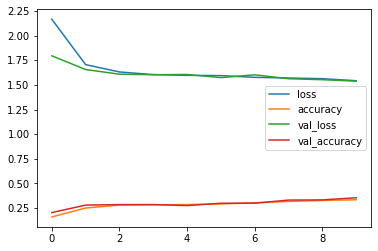

In [ ]:
pd.DataFrame(non_norm_history.history).plot()

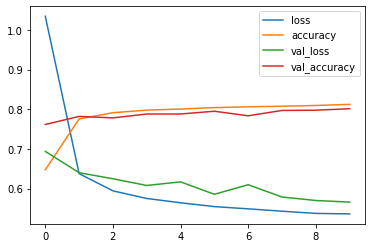

In [ ]:
pd.DataFrame(norm_history.history).plot()

Finding the right Learning rate of the model

In [ ]:
tf.random.set_seed(42)
model_3=tf.keras.Sequential([
                              tf.keras.layers.Flatten(input_shape=(28,28)),
                              tf.keras.layers.Dense(4,activation='relu'),
                              tf.keras.layers.Dense(4,activation='relu'),
                              tf.keras.layers.Dense(10,activation=tf.keras.activations.softmax)
])
model_3.compile(loss=tf.keras.losses.sparse_categorical_crossentropy,
                 optimizer='Adam',
                 metrics=['accuracy'])
lr_scheduler=tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3*10**(epoch/20))
lr_norm_history=model_3.fit(train_data_norm,
                          train_labels,
                          epochs=40,
                          validation_data=(test_data_norm,test_labels),
                          callbacks=[lr_scheduler])

Epoch 1/40
1875/1875 [==============================] - 3s 2ms/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617
Epoch 2/40
1875/1875 [==============================] - 3s 1ms/step - loss: 0.6366 - accuracy: 0.7759 - val_loss: 0.6400 - val_accuracy: 0.7808
Epoch 3/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5934 - accuracy: 0.7911 - val_loss: 0.6278 - val_accuracy: 0.7770
Epoch 4/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5749 - accuracy: 0.7969 - val_loss: 0.6122 - val_accuracy: 0.7871
Epoch 5/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5655 - accuracy: 0.7987 - val_loss: 0.6061 - val_accuracy: 0.7913
Epoch 6/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5569 - accuracy: 0.8022 - val_loss: 0.5917 - val_accuracy: 0.7940
Epoch 7/40
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5542 - accuracy: 0.8036 - val_loss: 0.5898 - val_accuracy:

Text(0.5, 1.0, 'Finding the ideal learning rate')

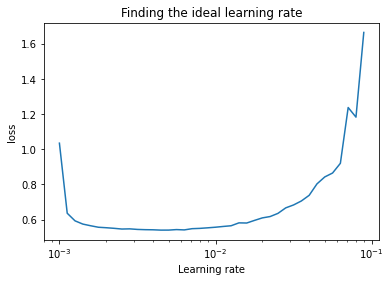

In [ ]:
#plot the learninf rate decay curve
lrs=1e-3 * (10**(tf.range(40)/20))
plt.semilogx(lrs,lr_norm_history.history['loss'])
plt.xlabel('Learning rate')
plt.ylabel("loss")
plt.title('Finding the ideal learning rate')

From the above curve it is evident that the correct learning rate should be 0.001 now we will use that learning rate in our model

In [ ]:
#Set the random seed
tf.random.set_seed(42)
#Creating the model
model_4=tf.keras.Sequential([
                              tf.keras.layers.Flatten(input_shape=(28,28)),
                              tf.keras.layers.Dense(4,activation='relu'),
                              tf.keras.layers.Dense(4,activation='relu'),
                              tf.keras.layers.Dense(10,activation=tf.keras.activations.softmax)
])
#compiling the model
model_4.compile(loss=tf.keras.losses.sparse_categorical_crossentropy,
                 optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                 metrics=['accuracy'])
#fitting the data into the model
history_4=model_4.fit(train_data_norm,train_labels,epochs=20,validation_data=(test_data_norm,test_labels))

Epoch 1/20
1875/1875 [==============================] - 3s 2ms/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617
Epoch 2/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6376 - accuracy: 0.7757 - val_loss: 0.6400 - val_accuracy: 0.7820
Epoch 3/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5942 - accuracy: 0.7914 - val_loss: 0.6247 - val_accuracy: 0.7783
Epoch 4/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5750 - accuracy: 0.7979 - val_loss: 0.6078 - val_accuracy: 0.7881
Epoch 5/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5641 - accuracy: 0.8006 - val_loss: 0.6169 - val_accuracy: 0.7881
Epoch 6/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5544 - accuracy: 0.8043 - val_loss: 0.5855 - val_accuracy: 0.7951
Epoch 7/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5488 - accuracy: 0.8063 - val_loss: 0.6097 - val_accuracy:

#Prediction of the model

Predicting the output of the model

In [ ]:
y_pred=model_4.predict(test_data_norm)

In [ ]:
#Convert all of the first 10 prediction proablities table
y_preds_int=y_pred.argmax(axis=1)
y_preds_int[:10]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

Visualizing the predictions of the model using confusion matrix

In [ ]:
def make_confusion_matrix(y_true,y_pred,classes=None,figsize=(20,20)):
  cm=confusion_matrix(y_true,y_pred)
  cm_norm=cm.astype('float')/cm.sum(axis=1)[:,np.newaxis]
  n_classes=cm.shape[0]

  fig,ax=plt.subplots(figsize=figsize)
  cax=ax.matshow(cm,cmap=plt.cm.Blues)
  fig.colorbar(cax)
  # classes=False
  if classes:
    labels=classes
  else:
    labels=np.arange(cm.shape[0])
  ax.set(title='Confusion Matrix',
        xlabel='Predicted Label',
        ylabel='True Label',
        xticks=np.arange(n_classes),
        yticks=np.arange(n_classes),
        xticklabels=labels,
        yticklabels=labels)
  
  #sett x-axis labels to bottom
  ax.xaxis.set_label_position('bottom')
  ax.xaxis.tick_bottom()

  #Adjust label size
  ax.yaxis.label.set_size(15)
  ax.xaxis.label.set_size(15)
  ax.title.set_size(15)

  threshold=(cm.max()+cm.min())/2
  for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
    plt.text(j, i , f"{cm[i,j]} ({cm_norm[i,j]*100:.1f}%)",
    horizontalalignment="center",
    color="white" if cm[i,j]>threshold else "black",
    size=15)

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


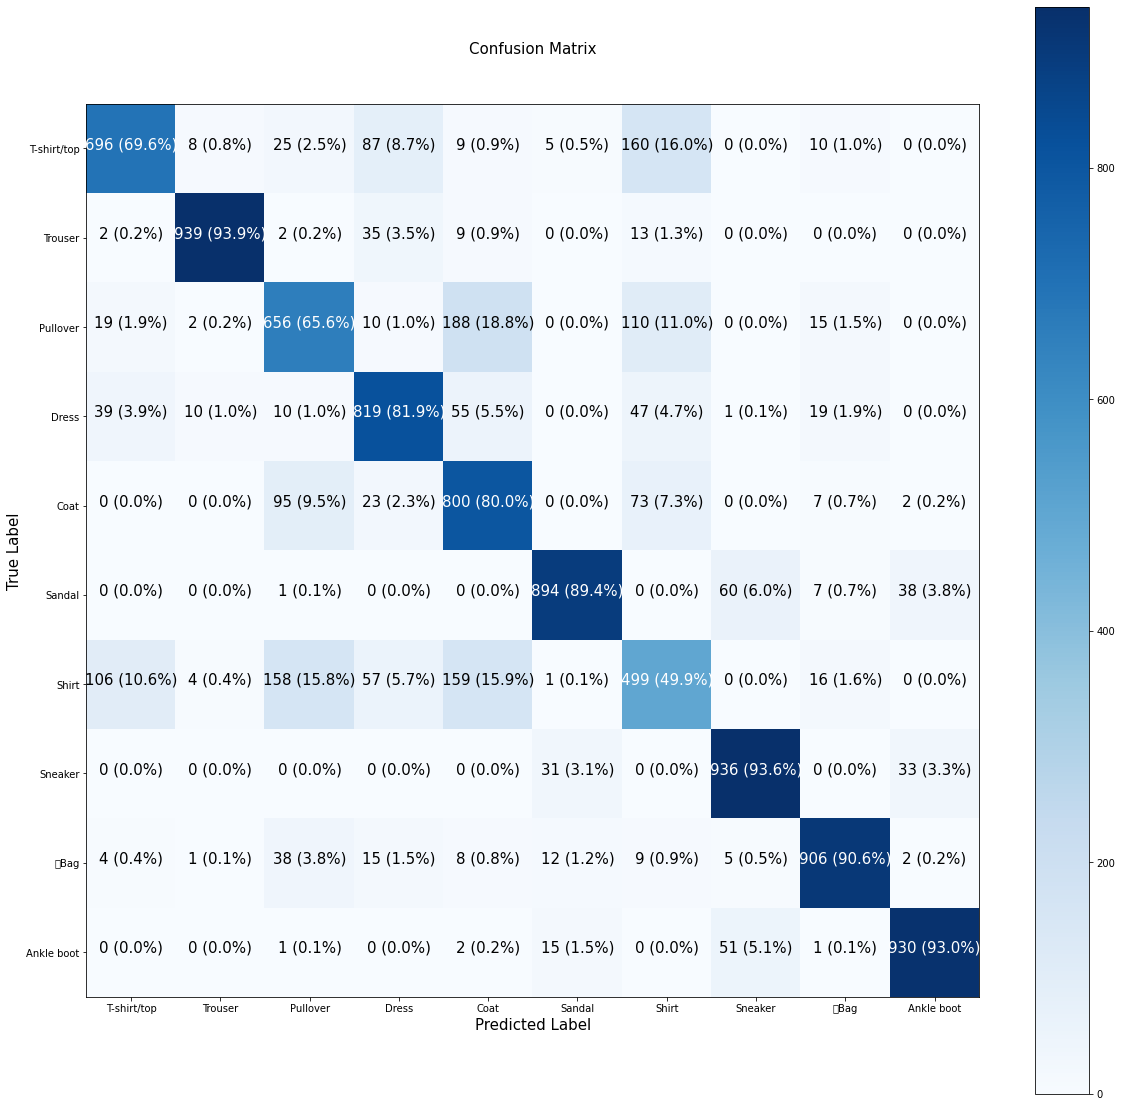

In [ ]:
make_confusion_matrix(test_labels,y_preds_int,classes=class_names)

From the above confusion matrix we see there are many instances where our model is confusing some of the items for similar objects and sometimes outputing the right data too.

---



---


So our model is fairly good in classifying different fashion accessories

Visualizing our models prediction by randomly selecting a test data

In [ ]:
import random
def plot_random_image(model,images,true_labels,classes):
  i=random.randint(0,len(images))

  target_image=images[i]
  pred_probs=model.predict(target_image.reshape(1,28,28))
  pred_label=classes[pred_probs.argmax()]
  true_label=classes[true_labels[i]]

  plt.imshow(target_image,cmap=plt.cm.binary)
  if pred_label==true_label:
    color='green'
  else:
    color="red"
  plt.xlabel("Pred:{} {:2.0f}% (True:{})".format(pred_label,
                                                 100*tf.reduce_max(pred_probs),
                                                 true_label),
             color=color
             )

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


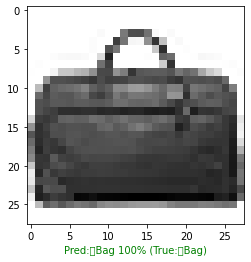

In [ ]:
plot_random_image(model_14,
                  images=test_data_norm,
                  true_labels=test_labels,
                  classes=class_names)